# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Datasets

In [4]:
df = pd.read_csv('hotel_bookings 2.csv')

# Exploratory Data Analysis and Data Cleaning

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [7]:
df.shape

(119390, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df['reservation_status_date'].head()

0    1/7/2015
1    1/7/2015
2    2/7/2015
3    2/7/2015
4    3/7/2015
Name: reservation_status_date, dtype: object

In [10]:
#changing the data type of the column from object to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [13]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [15]:
for col in df.describe(include='object').columns:
    print(col + '\n')
    print(df[col].unique())
    print('-'*50)

hotel

['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal

['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV

In [16]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
df.drop(['company','agent'], axis='columns', inplace=True)

In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [21]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

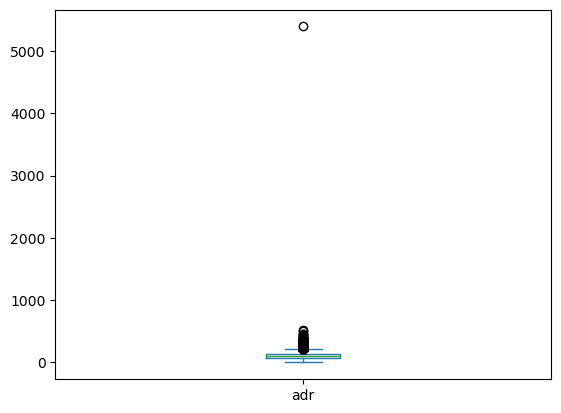

In [22]:
df['adr'].plot(kind='box')

In [24]:
df = df[df['adr']<5000]

<Axes: >

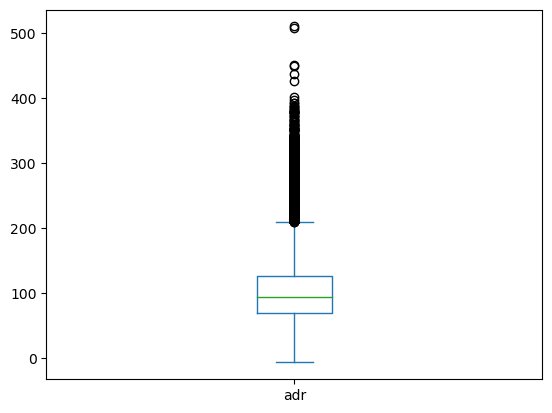

In [25]:
df['adr'].plot(kind='box')

# Data Analysis and Visualizations

In [26]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
cancelled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

Around 37% of the hotel bookings are getting cancelled

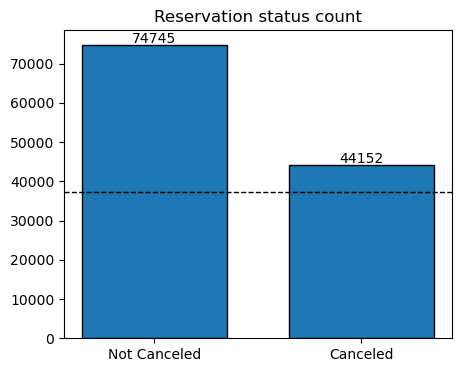

In [122]:
plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not Canceled','Canceled'], df['is_canceled'].value_counts(), edgecolor='k', width=0.7)

threshold = df['is_canceled'].value_counts()[0]/2
plt.axhline(y=threshold,linewidth=1, color='k', linestyle='--')

for i in range(2):
    plt.text(i, df['is_canceled'].value_counts()[i]+500, df['is_canceled'].value_counts()[i], ha='center')
plt.savefig('Reservation status count.png')

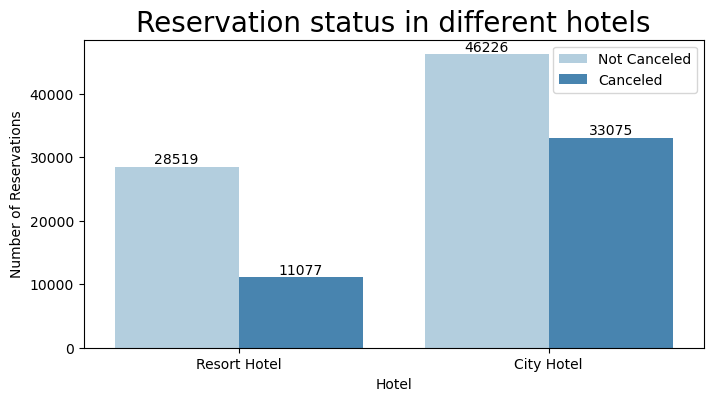

In [121]:
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette= 'Blues')
ax1.legend()
plt.title("Reservation status in different hotels", size = 20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.legend(['Not Canceled','Canceled'])
for i in ax1.containers:
    ax1.bar_label(i,)
plt.savefig('Reservation status in differnet hotels.png')

In [64]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [76]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)*100

0    58.291825
1    41.708175
Name: is_canceled, dtype: float64

In [77]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

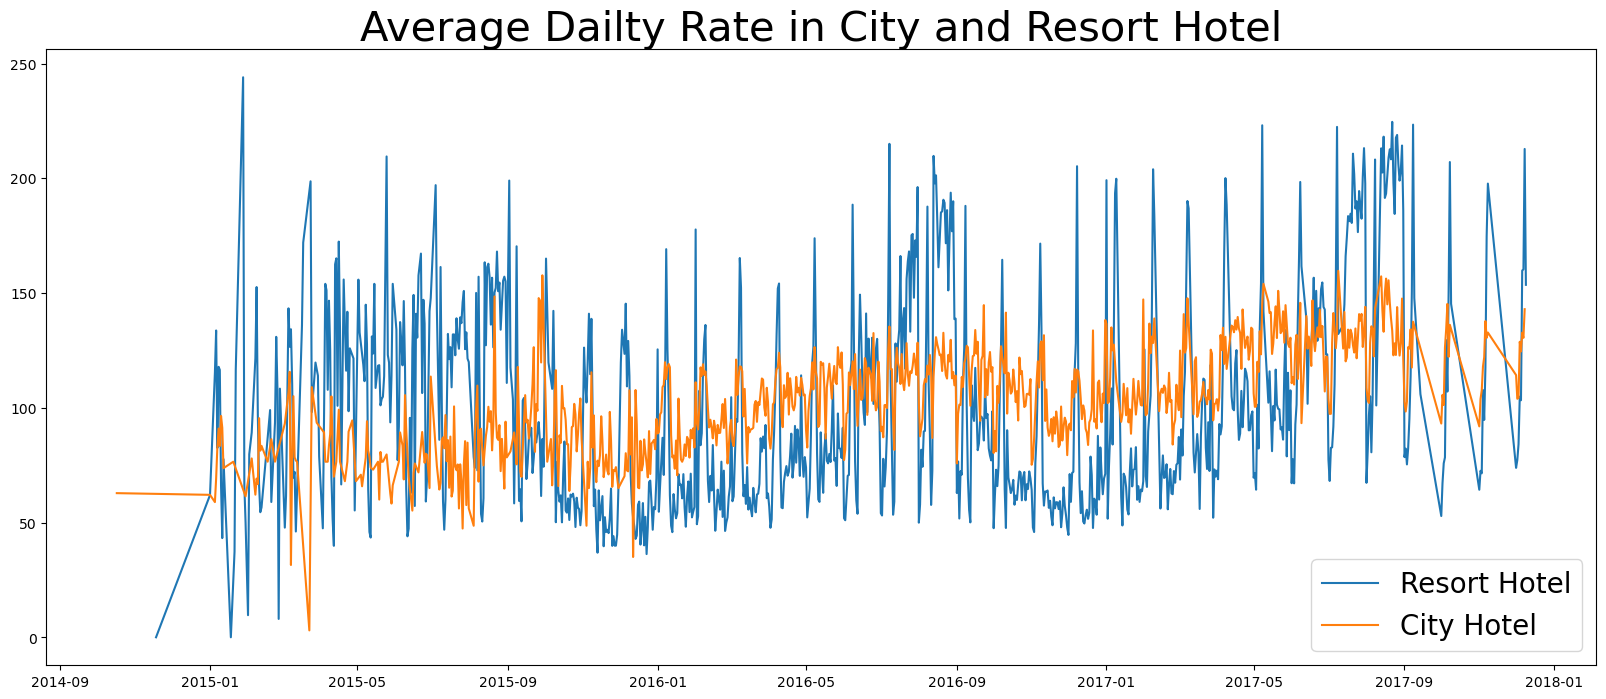

In [120]:
plt.figure(figsize=(20,8))
plt.title("Average Dailty Rate in City and Resort Hotel", fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend(fontsize=20)
plt.savefig('Average Daily Rate in City and Resort Hotel')

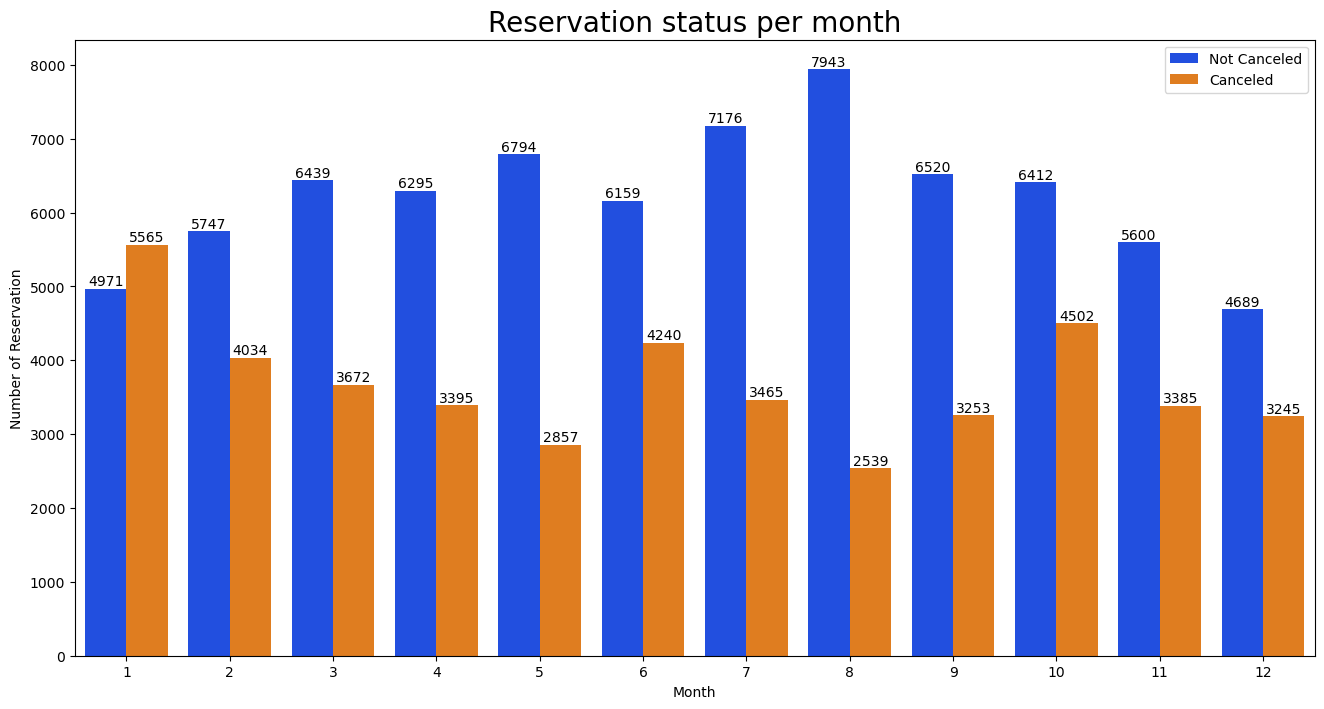

In [119]:
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize=(16,8))
ax2 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette= 'bright')
# plt.xticks(ticks= df['month'], labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
legend_labels,_ = ax2.get_legend_handles_labels()
ax2.legend()
plt.title("Reservation status per month", size = 20)
plt.xlabel("Month")
plt.ylabel("Number of Reservation")
plt.legend(['Not Canceled','Canceled'])
for i in ax2.containers:
    ax2.bar_label(i,)
plt.savefig('Reservation status per month.jpeg')

Here we are seeing that in the month of **May** and **August** Cancellation is minimum and Reservation is maximum, whereas, in the months of **January**, **June** and **October** cancellation is high whereas reservation is low.

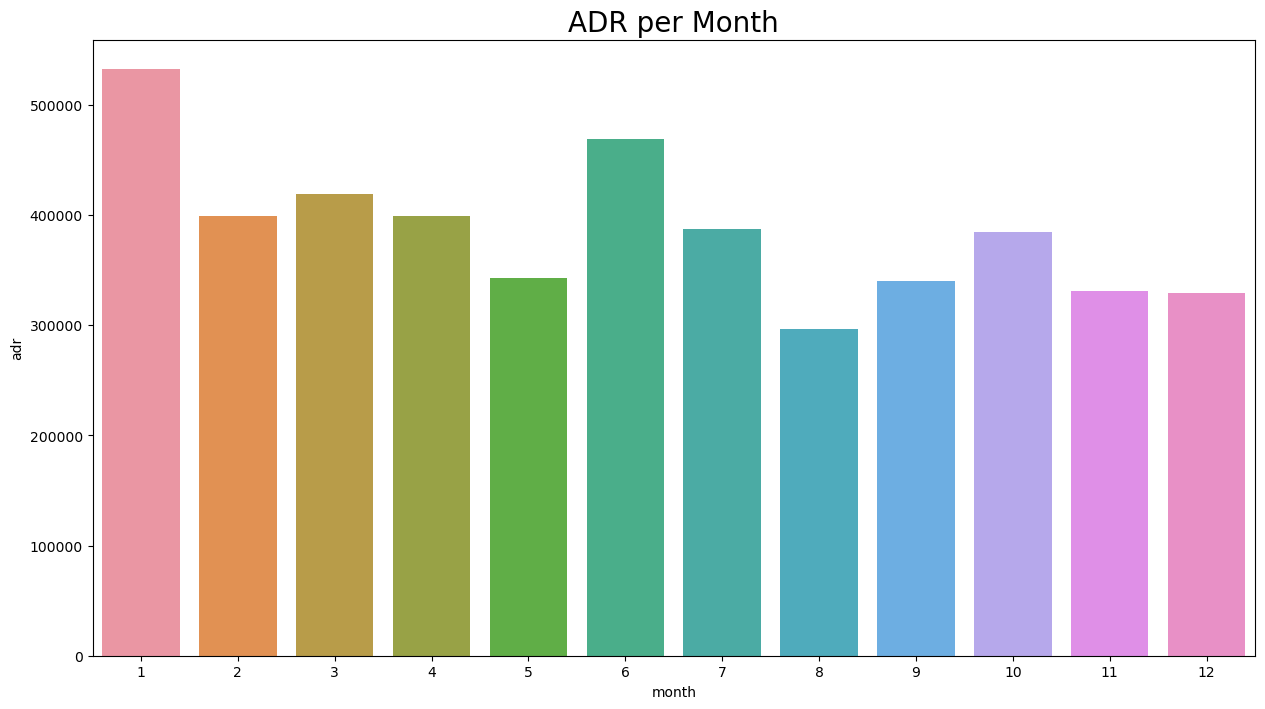

In [118]:
plt.figure(figsize=(15,8))
plt.title("ADR per Month", size=20)
sns.barplot(x = 'month', y = 'adr', data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.savefig('ADR per Month.jpeg')


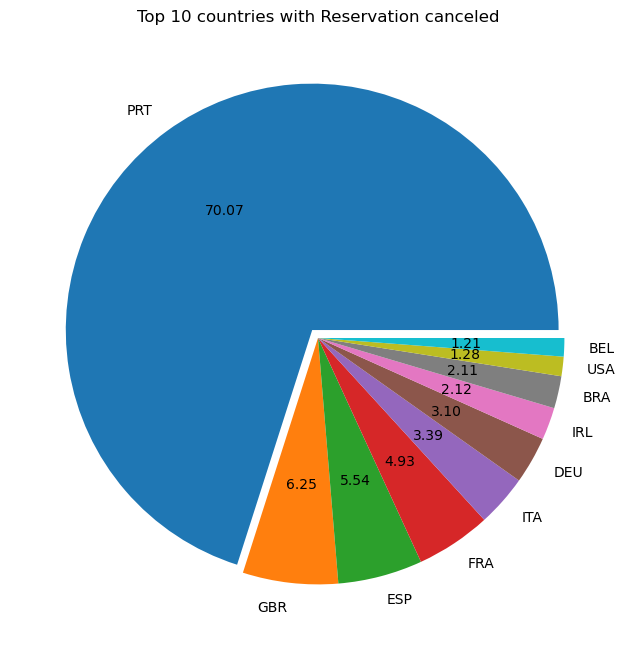

In [117]:
cancelled_data = df[df['is_canceled'] == 1]
top_to_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("Top 10 countries with Reservation canceled")
plt.pie(top_to_country, autopct='%.2f', labels = top_to_country.index, explode = [0.04,0,0,0,0,0,0,0,0,0])
plt.savefig('Top 10 countries with Rervation Canceled.jpeg', transparent=True)
plt.show()

In [101]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [102]:
df['market_segment'].value_counts(normalize=True)*100 #Percentage of the data

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64

In [103]:
cancelled_data['market_segment'].value_counts(normalize=True)*100

Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64

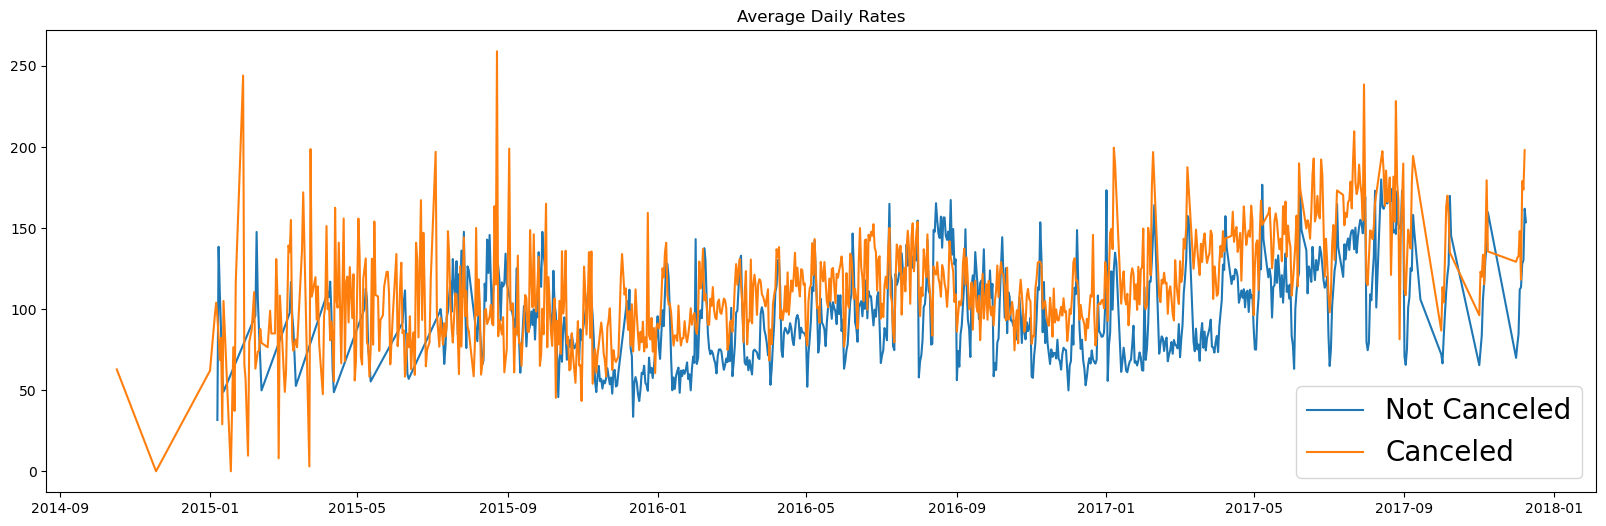

In [107]:
cancelled_data_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace=True)
cancelled_data_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = df[df['is_canceled']==0]
not_cancelled_data_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace=True)
not_cancelled_data_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,6))
plt.title("Average Daily Rates")
plt.plot(not_cancelled_data_adr['reservation_status_date'], not_cancelled_data_adr['adr'], label='Not Canceled')
plt.plot(cancelled_data_adr['reservation_status_date'], cancelled_data_adr['adr'], label='Canceled')
plt.legend(fontsize=20)


In [108]:
cancelled_data_adr = cancelled_data_adr[(cancelled_data_adr['reservation_status_date']>'2016') & (cancelled_data_adr['reservation_status_date']<'2017-09')]
not_cancelled_data_adr = not_cancelled_data_adr[(not_cancelled_data_adr['reservation_status_date']>'2016') & (not_cancelled_data_adr['reservation_status_date']<'2017-09')]

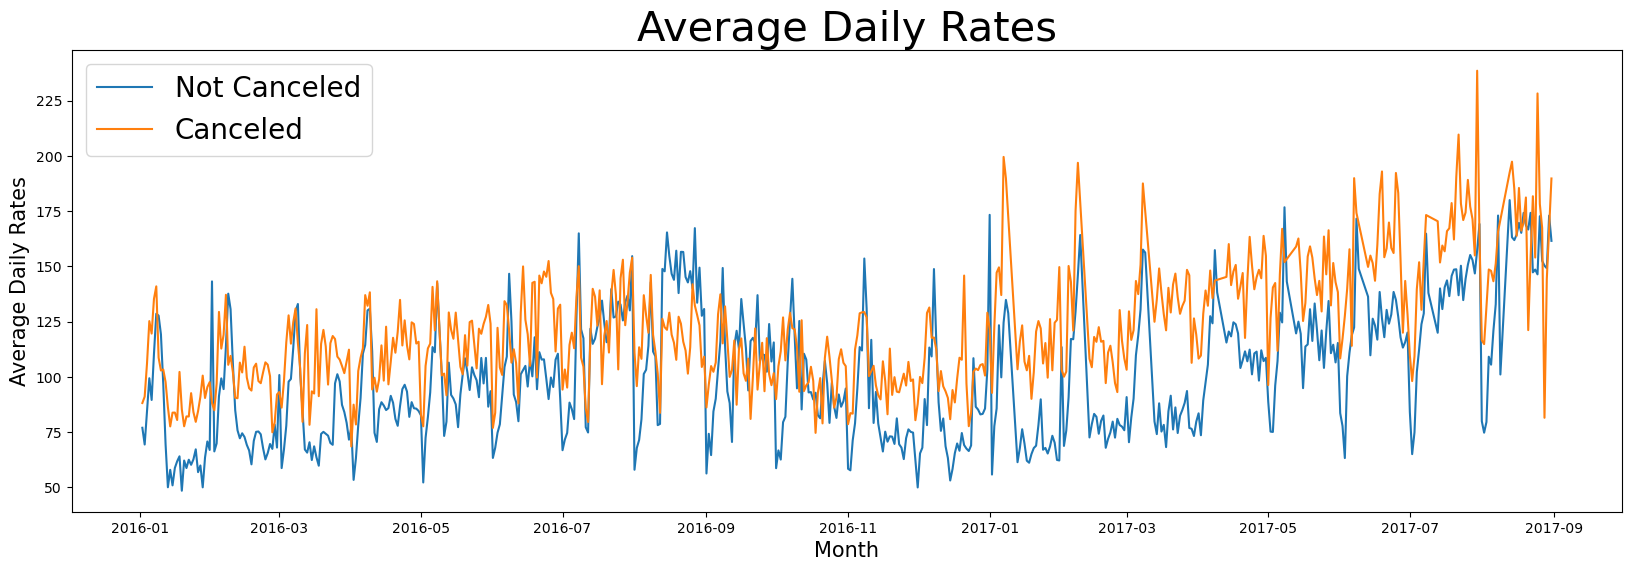

In [114]:
plt.figure(figsize=(20,6))
plt.title("Average Daily Rates", size=30)
plt.plot(not_cancelled_data_adr['reservation_status_date'], not_cancelled_data_adr['adr'], label='Not Canceled')
plt.plot(cancelled_data_adr['reservation_status_date'], cancelled_data_adr['adr'], label='Canceled')
plt.legend(fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Average Daily Rates", fontsize=15)
plt.savefig('Average Daily Rates.jpeg')

# Suggestions

1. Cancellation rates rise as the price does. In order to prevent cancellations of reservations, hoteld could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts to the customers.
2. As the ratio of the cancellation and not cancellation of the Resort Hotel is higher in the resort hotel than City Hotels. So the hotels should provide a reasonable discount on the room prices on the weekends or on holidays.
3. In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month.
4. They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.